## Assignment: Data visualization

As we've discussed in class, there are many different ways you can visualize data!  You've learned several techniques for data visualization in this class thus far.  This assignment will focus explicitly on data visualization, and include more of an emphasis on plot customization.  

The dataset we'll be using in this assignment is the popular "Baby names" dataset from the Social Security Administration, available at http://ssa.gov/oact/babynames/limits.html.  We'll be using a pre-processed dataset available in the R package `babynames`, which is a long-form table of baby names from 1880 to 2017. Download the dataset from TCU Online and upload to Colab or your Drive. Next, import the necessary libraries for this assignment, then read in the dataset and take a quick look:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

# Modify the path below to your data path
df = pd.read_csv('babynames.csv')
# Converting the year to integer for better display
df = df.assign(year = df.year.astype(int))

df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


The data frame has the following columns: `year`, which is the year the baby was born; `sex`, the sex of the baby; `name`, the name of the baby; `n`, the number of babies born with that name for that sex in that year; and `prop`, the proportion of babies of that sex in that year with that name.  As you can see, over 7 percent of female babies in 1880 were given the name Mary!  Now let's take a look at the size of our data frame.  

In [2]:
df.shape

(1924665, 5)

Our data frame has 1.92 million rows!  As such, this isn't a dataset that you could reasonably deal with manually.  Also: Excel worksheets cannot handle data of this size, as they have row limits of 1,048,576 rows, which takes us up to around 1989.  This is not a dataset that is "big" by standard definitions, as it is only about 49 MB in size given the small number of columns.  However, it is much-better suited to a computational approach to data analysis like Python/`pandas`.  

Granted, with 1.9 million rows in our dataset, we'll need to carefully consider our research questions and how they can help us cut down the size of our dataset.  In this notebook, I'd like you to get experience with three skills in Python plot customization:

1. Modifying chart properties
2. Annotation/labeling
3. Small multiples

To do this, we are going to focus on three topics:

1. What were the most popular names in 2017 (the last year in the dataset), and how did their popularity change over the past 10 years?
2. How does the release of Disney princess movies influence the popularity of baby names?
3. How have various gender-neutral names shifted in popularity between male & female over time?  

You'll then get a chance to do some of this on your own at the end of the assignment.  

### Question 1: What were the most popular names in 2017, and how did their popularity change over the past 10 years?

To get started with this question, we need to do some subsetting, which you are very familiar with by now.  Let's look specifically at males for this first question.  First and foremost, however, we need to figure out the most popular male baby names in 2017.  A few `pandas`/Python methods that you've learned in previous assignments can get this done.  

Notice what we are doing here - you can think of the line of code as a _chain_ of methods in which we are manipulating the `df` data frame in turn.  

* First, we subset the data frame for only those male records in 2017;
* Then, we sort the data frame in descending order by count;
* Then, we slice the data frame to get back the top 15 rows;
* Finally, we ask `pandas` to generate a list of names from our subsetted and sorted data frame.  

In [3]:
# Subset for males in 2017
male17 = df.query('year == 2017 & sex == "M"')
# Sort in descending order of the number of names
male17sorted = male17.sort_values('n', ascending = False)
# Slice the sorted data frame for the first 15 rows
top_male = male17sorted[0:15]
# Pull the name column from the sliced data frame and convert to a list
name_list = top_male.name.tolist()

name_list

['Liam',
 'Noah',
 'William',
 'James',
 'Logan',
 'Benjamin',
 'Mason',
 'Elijah',
 'Oliver',
 'Jacob',
 'Lucas',
 'Michael',
 'Alexander',
 'Ethan',
 'Daniel']

`pandas` returns a Python list of the top 15 baby names in 2017 for boys.  We can then pass this list to the `.isin()` method to get back entries for all of those names since 2000, and calculate their frequency per 1000 records in the dataset.  

In [4]:
sub1 = (df
    .query('name in @name_list & year > 1999 & sex == "M"')
    .assign(per1000 = df.prop * 1000)
)

sub1.head()

,year,sex,name,n,prop,per1000
1350393,2000,M,Jacob,34471,0.016514,16.51392
1350394,2000,M,Michael,32035,0.015347,15.34691
1350401,2000,M,Daniel,22312,0.010689,10.68894
1350403,2000,M,William,20659,0.009897,9.89704
1350410,2000,M,James,17981,0.008614,8.61410


We are just about ready to visualize the data now.  There are multiple ways these data could be visualized; in this instance, we'll use a __heatmap__, which we discussed in class.  A heatmap is a grid of cells in which the shading of each cell is proportional to its value.  Generally, darker cells represent a greater value.  When applied to temporal data, it can be an effective way to show the variation of values for multiple data series over time.  

Heatmaps in `seaborn` take a wide-format data frame with the y-values in the index, the x-values as the columns, and the data values in the cells.  We will use the `.pivot()` method to reshape our data and produce this type of data frame, then pass the dataframe to the `heatmap()` function.  

<Axes: xlabel='year', ylabel='name'>

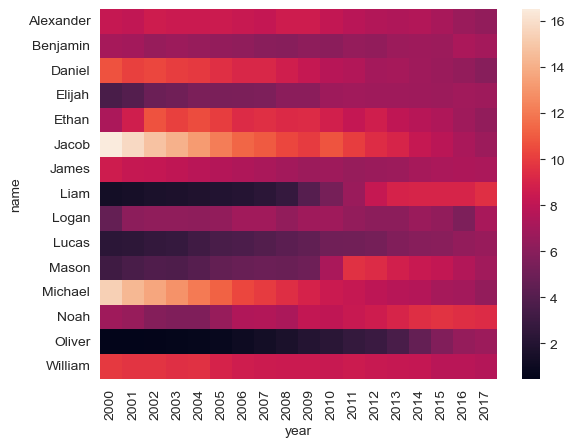

In [5]:
wide1 = sub1.pivot(index = 'name', columns = 'year', values = 'per1000')

sns.heatmap(wide1)

The plot looks nice by default; we can see some trends such as the ascension of Liam, Aiden, and Noah and the relative descent of Michael and Jacob (although both of those names are still in the top 15, of course).  However, you may still want to customize your chart.  

`seaborn` plots have many plot customization options built-in; you'll learn how to use a few later in the assignment.  `seaborn` plots, however, are also `matplotlib` objects, which is the core plotting library in Python.  In turn, you can use the wealth of functions available in `matplotlib` to modify your `seaborn` plots.  You'll learn a few of those methods in this assignment.  

Note the code below and what we are doing.  We'll import the `pyplot` module from `matplotlib` in the standard way as `plt`.  `pyplot` gives us access to many different plot customization functions.  We can set the figure size before calling the plotting function, then rotate the x-tick labels, remove the axis labels, and add a title to our chart.  Also, notice the arguments passed to `sns.heatmap()`.  The `annot` parameter allows us to annotate the heatmap with data values, and the `cmap` parameter allows us to adjust the colors.  It accepts all ColorBrewer palettes as well as the built-in `matplotlib` palettes.  

Text(0.5, 1.0, 'Most popular baby names - Male (rate per 1000)')

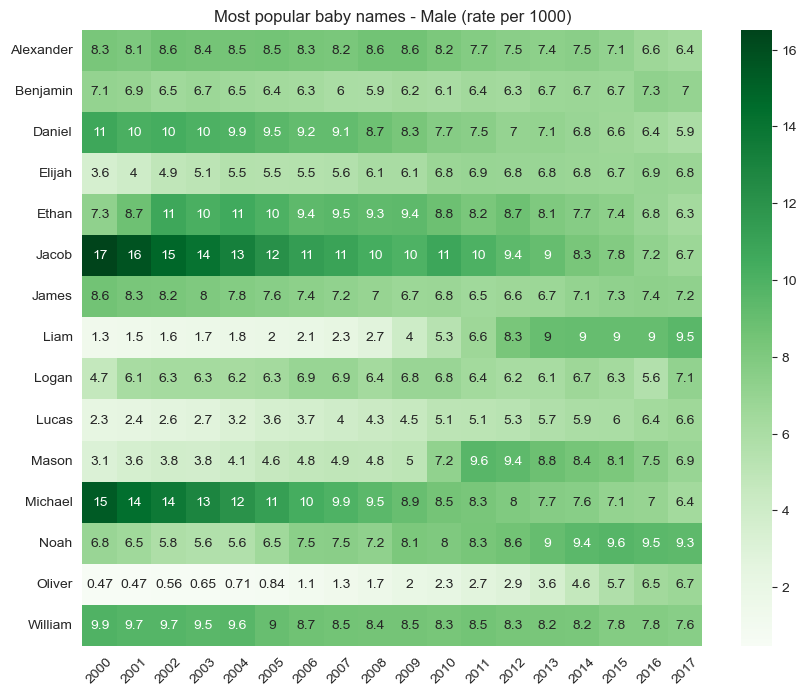

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8), )
sns.heatmap(wide1, annot = True, cmap = 'Greens')

plt.xticks(rotation = 45)
plt.ylabel("")
plt.xlabel("")
plt.title("Most popular baby names - Male (rate per 1000)")

### Question 2: How does the release of Disney movies influence the popularity of baby names?

Baby names can sometimes be responsive to trends in popular culture.  For example, "Daenerys" showed up in the dataset for the first time in 2012, and 82 baby girls were named Daenerys in 2015!.  In this exercise, we'll examine how the release of Disney Princess movies relates to baby names.

Let's examine trends in female baby names since 1980 for four Disney Princess names: Jasmine, Ariel, Elsa, and Tiana.  

In [7]:
sns.set_style("darkgrid")
princesses = ['Jasmine', 'Ariel', 'Elsa', 'Tiana']

princess_df = (df
    .query('name in @princesses & sex == "F" & year > 1979')
    .assign(per1000 = df.prop * 1000)
)

princess_df.head()

,year,sex,name,n,prop,per1000
864036,1980,F,Jasmine,1187,0.000667,0.66672
864335,1980,F,Tiana,377,0.000212,0.21175
864519,1980,F,Elsa,243,0.000136,0.13649
864674,1980,F,Ariel,181,0.000102,0.10166
883456,1981,F,Jasmine,1400,0.000783,0.78290


Clearly, Jasmine was a popular name in the early 1980s prior to the release of Aladdin.  Tiana, Ariel, and Elsa, however, were not as popular.  So how did their popularity shift over time?  

We'll make a line chart using the `lineplot()` function in `seaborn`.  `sns.lineplot()` takes a long-form data frame like our babynames data frame along with a mapping of x and y values for a given dataset.  The `hue` argument, if specified, will divide up the data into groups within a given column and plot a separate line, with different colors, for each group.

<Axes: xlabel='year', ylabel='per1000'>

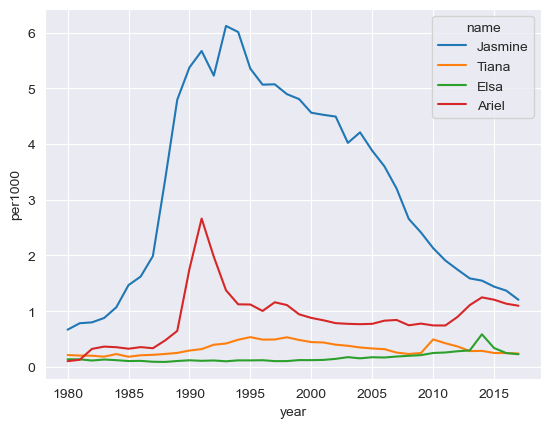

In [8]:
sns.lineplot(data = princess_df, x = "year", y = "per1000", hue = "name")

We can start to get a sense here of some "spikes" in the data - for example, a clear spike in babies named Ariel is evident after 1989, which is when _The Little Mermaid_ was released.  We can also note small spikes for Tiana and Elsa after the release of their respective movies.  

However - how can we express this on the chart in clearer terms?  One way to accomplish this is through __annotation__, which refers to the placement of text on the plot to highlight particular data points.  Before doing this, let's figure out approximately what the values are for each princess name when its movie was released:

In [9]:
disney_yrs = {'Ariel': 1989,
             'Elsa': 2013,
             'Jasmine': 1992,
             'Tiana': 2009}

for princess, year in disney_yrs.items():
    # Subset the data frame for princess and year
    subset = princess_df.query('name == @princess & year == @year')
    # Extract the value for per1000 with .values
    # .values returns a list, so we'll extract the 0th element
    value = subset.per1000.values[0]
    print(princess + ': ' + str(value))

Ariel: 0.64461
Elsa: 0.2942
Jasmine: 5.2262699999999995
Tiana: 0.24864


I accomplished this with a little new Python code.  I've mentioned before the `dict`, a type of Python object enclosed in curly braces (`{}`) that can hold key-value pairs.  The _key_ comes before the colon, the _value_ comes after the colon, and each element of the dictionary is separated by a comma.  

In this case, our dictionary holds the name of the Disney princess, and the year that the corresponding film was released.  Dictionaries can be iterated through with `for` and the `.items()` method; in this example, `princess` represents the key in the loop, and `year` represents the value.  Within the loop, we can first create a princess and year-specific subset of our data frame, then extract the corresponding value from it.

Spend some time reading through the `plt.annotate()` code below so that you can understand it.  We're using a number of parameters here:

* The annotation text is the first argument.  Python will interpret the string '\n' as a line break, which allows us to put the text on multiple lines.  
* The `xy` parameter refers to the data coordinates of the point we want to annotate, given that we've specified this with the `'data'` argument supplied to the `xycoords` parameter.  We'll use the year of the film release for the X value, and the data values we obtained above (approximately) for the Y value.  
* In this case, however, we don't want to put the text right on top of the lines themselves; as such, we can specify an offset, and connect our text with the data point with an arrow.  We use the `xytext` and `textcoords` parameters to do this; have a look at the plot and see where this puts the text.  The argument supplied to `arrowprops`, which are in the form of a `dict`, govern the appearance of the arrow.  

Annotation often takes iteration and patience to get it right.  Try changing some of the arguments in the `plt.annotate()` calls below and see how the text and arrows move around!

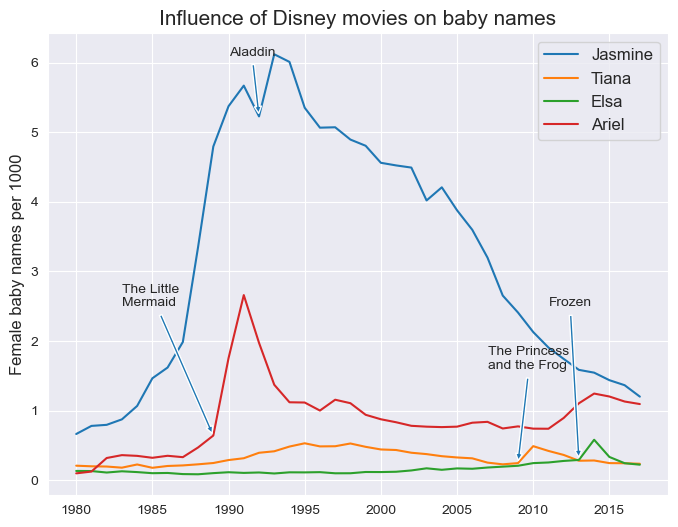

In [10]:
# Set the figure size
plt.figure(figsize = (8, 6))
# Generate the chart
sns.lineplot(data = princess_df, x = "year", y = "per1000", hue = "name")

# Build each annotation individually
plt.annotate('The Little \nMermaid', xy = (1989, 0.64), xycoords = 'data',
            xytext = (1983, 2.5), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('Aladdin', xy = (1992, 5.23), xycoords = 'data',
            xytext = (1990, 6.1), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('Frozen', xy = (2013, 0.294), xycoords = 'data',
            xytext = (2011, 2.5), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('The Princess \nand the Frog', xy = (2009, 0.247), xycoords = 'data',
            xytext = (2007, 1.6), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.ylabel("Female baby names per 1000", fontsize = 12)
plt.xlabel("")
plt.title("Influence of Disney movies on baby names", fontsize = 15)
plt.legend(title = "", fontsize = 12)

### Question 3: How have gender-neutral names shifted in popularity between male and female over time?

For the third and final question, we'll be looking at how four gender-neutral names have shifted between male and female over time.  Let's produce a new data frame from our original data frame that subsets for four popular gender-neutral names: Jordan, Riley, Peyton, and Taylor.  We'll take rows for years 1960 and later, and fill NaN values with 0.  

In [11]:
neutral_names = ['Jordan', 'Peyton', 'Taylor', 'Riley']

In [12]:
neutral_df = (df
    .query('name in @neutral_names & year > 1959')
    .fillna(0)
)

neutral_df.head()

,year,sex,name,n,prop
576603,1960,F,Taylor,11,0.000005
577863,1960,F,Jordan,7,0.000003
580462,1960,M,Jordan,137,0.000063
580537,1960,M,Riley,108,0.000050
580590,1960,M,Taylor,93,0.000043


In Assignment 6, you learned how to make faceted plots are available using the `catplot()` function, which is appropriate for charts that have a categorical axis.  The companion `relplot()` function can be used for plots with two continuous axes, such as scatterplots or lineplots. Let's try plotting faceted line charts that show how counts for these names vary by gender over time:

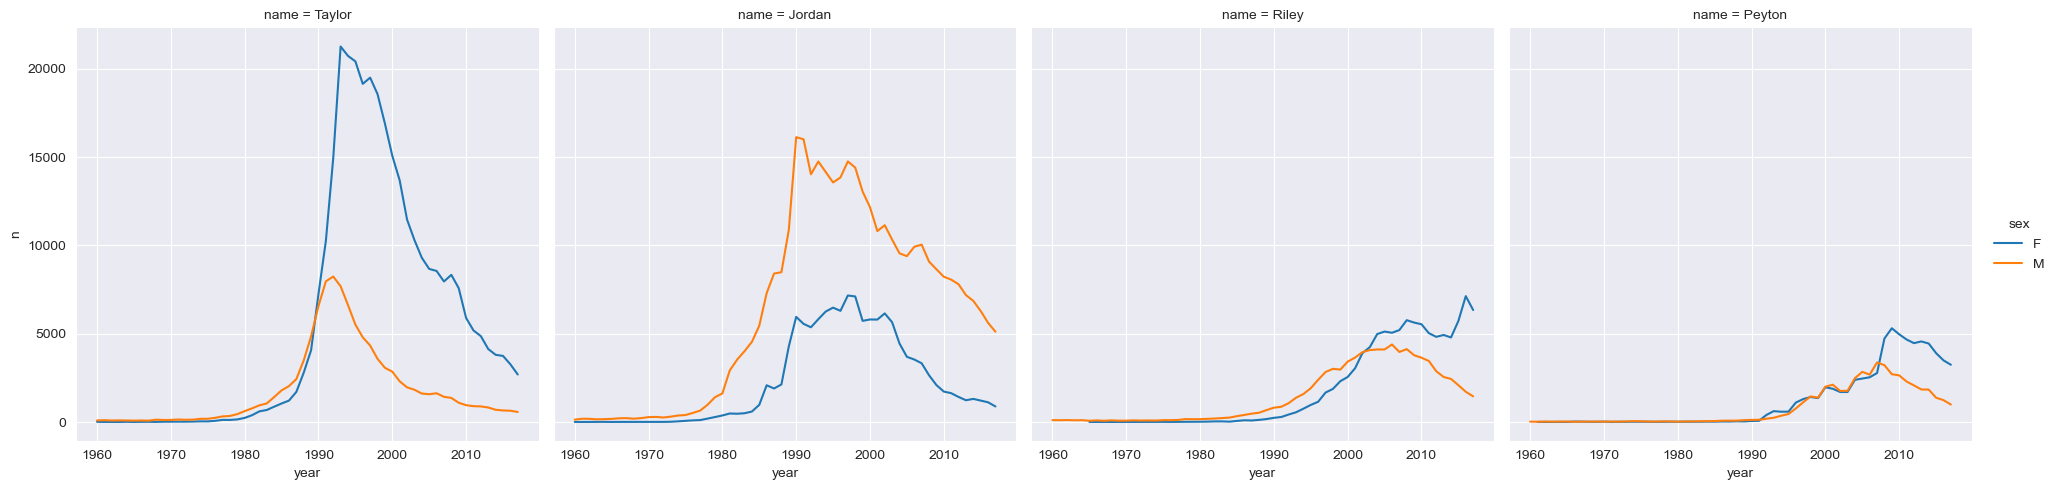

In [13]:
sns.relplot(data = neutral_df, x = "year", y = "n", hue = "sex", col = "name", kind = "line")

We can start to get a sense of some of the variations here; Taylor is more popular among girls than boys, whereas the opposite is true for Jordan.  Let's make a few modifications to the plot to improve its clarity.  We will add a `col_wrap` argument to specify how many columns to create in our plot grid.  We can also change the colors with the argument supplied to `palette`, and we can specify a `height` argument to modify the plot size.

Additionally, plot objects themselves have methods that you can use to modify the chart appearance; we'll use `.set_axis_labels()` to improve the look of our axes, and we can modify the title of the legend as well.  

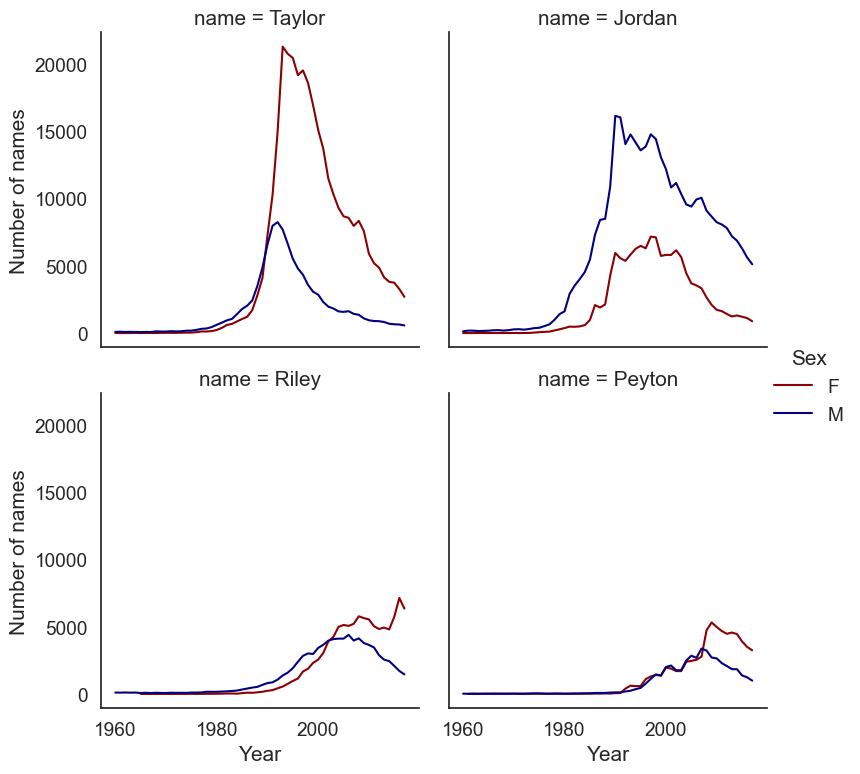

In [14]:
# Note the font_scale argument that increases all font size by 25 percent
sns.set(style = "white", font_scale = 1.25)

chart = sns.relplot(data = neutral_df, x = "year", y = "n",
                    hue = "sex", col = "name", kind = "line",
                    col_wrap = 2, palette = ["darkred", "navy"],
                    height = 4)

chart.set_axis_labels('Year', 'Number of names')
chart._legend.set_title('Sex')

## Exercises

To get credit for this assignment, you are going to apply what you've learned to some additional tasks using the baby names dataset.  Some of this will involve re-producing some of the analyses in the notebook, but for different prompts.  

__Exercise 1:__ Re-create the heatmap from Question 1, but this time for females.  What trends do you observe?  

__Exercise 2:__ Create a line chart that shows how a name of your choice has varied in popularity over time.  Find out the year when your chosen name peaked in popularity, and annotate your chart to show where this peak is located on the line.  

__Exercise 3:__ In Question 2, we looked at the possible influence of Disney princess movies on female baby names.  Pick four other names (male or female) from popular culture over the past 30 years and produce a chart that illustrates their influence (or lack thereof) on baby names.  Be strategic with your name decisions!  You can create a single line chart with four series, or a small multiples chart with facets - pick the one you think is ideal!